
<center>

# <span style="color:rgb(0,0,250)">Homework 2</span>

## <span style="color:rgb(0,0,250)">AME 5763</span>
## <span style="color:rgb(0,0,250)">Blake Johnson</span>
</center>

### Problem 4.1:
### Consider a four node cubic element in one dimension. The element length is 3 with $x_1 =-1$ ; the remaining nodes are equally spaced.
#### Part A:
#### Construct the Element Shape Function

In [202]:
%% Define the shape functions for a 1D cubic element.
% I used the Direct Construction Functions on page 83
syms x

x_1 = -1;
x_2 = 0;
x_3 = 1;
x_4 = 2;
% Shape function N1(x)
N1 = ((x-x_2)*(x-x_3)*(x-x_4))/((x_1-x_2)*(x_1-x_3)*(x_1-x_4));
% Shape function N2(x)
N2 = ((x-x_1)*(x-x_3)*(x-x_4))/((x_2-x_1)*(x_2-x_3)*(x_2-x_4));
% Shape function N3(x)
N3 = ((x-x_1)*(x-x_2)*(x-x_4))/((x_3-x_1)*(x_3-x_2)*(x_3-x_4));
% Shape function N4(x)
N4 = ((x-x_1)*(x-x_2)*(x-x_3))/((x_4-x_1)*(x_4-x_2)*(x_4-x_3));



The Element Shape functions are:


In [203]:
disp(N1)

-(x*(x - 1)*(x - 2))/6
 


In [204]:
disp(N2)

((x - 1)*(x + 1)*(x - 2))/2
 


In [205]:
disp(N3)

-(x*(x + 1)*(x - 2))/2
 


In [206]:
disp(N4)

(x*(x - 1)*(x + 1))/6
 




#### Part B:
#### Find the displacement field when
$$
d^{e} =
\begin{pmatrix}
    u_1 \\
    u_2 \\
    u_3 \\
    u_4
\end{pmatrix}
= 10^{-3}
\begin{pmatrix}
    1 \\
    0 \\
    1 \\
    4
\end{pmatrix}
$$




In [207]:

u1 = 1e-3;
u2 = 0;
u3 = 1e-3;
u4 = 4e-3;

u = [u1; u2; u3; u4];
% Displacement field u(x) from (4.5)
u_x = N1*u1 + N2*u2 + N3*u3 + N4*u4;

% Simplify the expression for clarity
u_x_simplified = simplify(u_x);



The displacement field in the element with the given parameters is:


In [208]:
disp(u_x)

(x*(x - 1)*(x + 1))/1500 - (x*(x - 1)*(x - 2))/6000 - (x*(x + 1)*(x - 2))/2000
 


In [209]:
disp(u_x_simplified)

x^2/1000
 



#### Part C:
#### Evaluate the $B^e$ matrix and find the strain for the above displacement field.

In [210]:
% The B matrix is the matirx that relates the nodal displacement to the
% strain of the element (4.10) on page 81

e_1 = diff(N1,x);
e_2 = diff(N2,x);
e_3 = diff(N3,x);
e_4 = diff(N4,x);

B_e = [e_1 e_2 e_3 e_4];

% Strain of the displacement field is B_e*u(x) from (4.9)

strain = B_e * u;
strain_simplify = simplify(strain);


The strain for the displacement field is:


In [211]:
disp(strain)

((x - 1)*(x + 1))/1500 - ((x - 1)*(x - 2))/6000 - ((x + 1)*(x - 2))/2000 + (x*(x - 1))/2000 + (x*(x + 1))/6000 - (x*(x - 2))/1500
 


In [212]:
disp(strain_simplify)

x/500
 


#### Part D:
#### Plot the Displacement Field $u(x)$ and Strain Field $\epsilon (x)$


In [213]:
% Define a range for x from -1 to 2 (element length)
x_vals = linspace(-1, 2, 100);

% Convert symbolic expressions to MATLAB functions for plotting
% In other words my functions are mathematical equations where x is a symbol.
% I need to set it up so that I can use numerical values for x to graph.
% So, I am converting the equations to a format that can graph the functions accordingly.

u_x_func = matlabFunction(u_x_simplified);
strain_x_func = matlabFunction(strain_simplify);

% Compute displacement and strain values over the range of x
u_vals = u_x_func(x_vals);
strain_vals = strain_x_func(x_vals);



Plots of the displacement u(x) and the strain e(x):


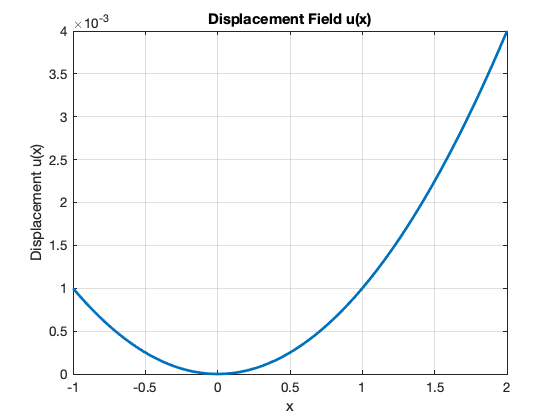

In [214]:
% Plot displacement field
figure;
plot(x_vals, u_vals, 'LineWidth', 2);
title('Displacement Field u(x)');
xlabel('x');
ylabel('Displacement u(x)');
grid on;

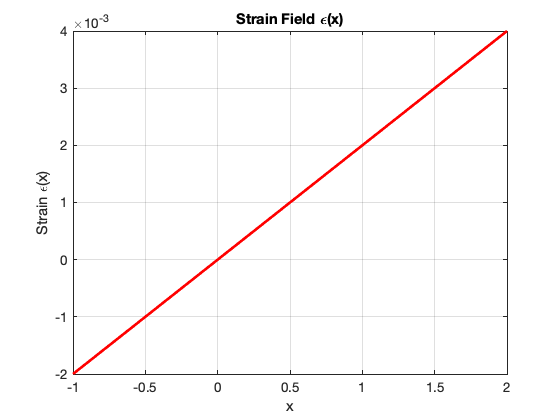

In [215]:

% Plot strain field
figure;
plot(x_vals, strain_vals, 'LineWidth', 2, 'Color', 'r');
title('Strain Field \epsilon(x)');
xlabel('x');
ylabel('Strain \epsilon(x)');
grid on;

#### Part E:
#### Find the Strain Field when the nodal displacements are $d^{eT} =[1111]$ . Why is the result expected?

In [216]:
% now the displacement field is changing and is given to us in the problem
% Nodal displacements d^e = [1 1 1 1]
u1_new = 1;
u2_new = 1;
u3_new = 1;
u4_new = 1;

% New displacement field u(x)
u_new = N1*u1_new + N2*u2_new + N3*u3_new + N4*u4_new;

% New strain field (derivative of u(x))
strain_new = diff(u_new, x);

% Simplify the new strain expression
strain_new_simplified = simplify(strain_new);


The new strain field with uniform nodal displacement is:


In [217]:
disp(strain_new_simplified);

0
 



This is expected because the all the nodes have the same displacement. So the bar is moving the same distane and the length of the bar does not change.


### 4.3:
### Derive the shape functions for a two\-node one\-dimensional element which is $C^1$ continuous. Note that the shape functions derived in Chapter 4 are $C^0$ continuous. To enforce $C^1$ continuity, it is necessary to enforce continuity of displacements and their derivatives. Start by considering a complete cubic approximation $u^e =\alpha_0^e +\alpha_1^e x+\alpha_2^e x^2 +\alpha_3^e x^3$ and derive four shape functions corresponding to the displacements and their derivatives at each node.

In [218]:
syms y

% since they asked for a two node linear element I focused mostly on section 4.1
% I used the concept from (4.3) for my M matrix

M = [1 x x^2 x^3; 0 1 2*x 3*x^2; 1 y y^2 y^3; 0 1 2*y 3*y^2];

% I just had MATLAB do the inverse for me instead of using the equation from the book
% MATLAB automatically simplified the sigma values. That was kind of cool.
M_i = inv(M);
disp(M_i)

[(- y^3 + 3*x*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),      -(x*y^2)/(x^2 - 2*x*y + y^2), -(- x^3 + 3*y*x^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),      -(x^2*y)/(x^2 - 2*x*y + y^2)]
[         -(6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (y^2 + 2*x*y)/(x^2 - 2*x*y + y^2),            (6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (x^2 + 2*y*x)/(x^2 - 2*x*y + y^2)]
[      (3*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),    -(x + 2*y)/(x^2 - 2*x*y + y^2),       -(3*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),    -(2*x + y)/(x^2 - 2*x*y + y^2)]
[               -2/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),             1/(x^2 - 2*x*y + y^2),                  2/(x^3 - 3*x^2*y + 3*x*y^2 - y^3),             1/(x^2 - 2*x*y + y^2)]
 


In [219]:
% I am solving for the element shape function N, so I want to use (4.5)
% I need p to solve (4.5) so I used (4.2) to set up an equation for p in each node.
p1 = M(1,:);

p2 = M(2,:);

p3 = M(3,:);

p4 = M(4,:);

% Use (4.5) to get the values N1, N2, N3, N4 for the element shape function

N1 = p1 * M_i;

N2 = p2 * M_i;
N3 = p3 * M_i;

N4 = p4 * M_i;

disp(N1);

[(- y^3 + 3*x*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (2*x^3)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (3*x^2*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x^2*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), x^3/(x^2 - 2*x*y + y^2) + (x*(y^2 + 2*x*y))/(x^2 - 2*x*y + y^2) - (x*y^2)/(x^2 - 2*x*y + y^2) - (x^2*(x + 2*y))/(x^2 - 2*x*y + y^2), (2*x^3)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (- x^3 + 3*y*x^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (3*x^2*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (6*x^2*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), x^3/(x^2 - 2*x*y + y^2) + (x*(x^2 + 2*y*x))/(x^2 - 2*x*y + y^2) - (x^2*y)/(x^2 - 2*x*y + y^2) - (x^2*(2*x + y))/(x^2 - 2*x*y + y^2)]
 


In [220]:

disp(N2);

[(6*x*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (y^2 + 2*x*y)/(x^2 - 2*x*y + y^2) + (3*x^2)/(x^2 - 2*x*y + y^2) - (2*x*(x + 2*y))/(x^2 - 2*x*y + y^2), (6*x^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (x^2 + 2*y*x)/(x^2 - 2*x*y + y^2) + (3*x^2)/(x^2 - 2*x*y + y^2) - (2*x*(2*x + y))/(x^2 - 2*x*y + y^2)]
 


In [221]:

disp(N3);

[(- y^3 + 3*x*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (2*y^3)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (3*y^2*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), y^3/(x^2 - 2*x*y + y^2) + (y*(y^2 + 2*x*y))/(x^2 - 2*x*y + y^2) - (x*y^2)/(x^2 - 2*x*y + y^2) - (y^2*(x + 2*y))/(x^2 - 2*x*y + y^2), (2*y^3)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (- x^3 + 3*y*x^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (3*y^2*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (6*x*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), y^3/(x^2 - 2*x*y + y^2) + (y*(x^2 + 2*y*x))/(x^2 - 2*x*y + y^2) - (x^2*y)/(x^2 - 2*x*y + y^2) - (y^2*(2*x + y))/(x^2 - 2*x*y + y^2)]
 


In [222]:

disp(N4);

[(6*y*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (y^2 + 2*x*y)/(x^2 - 2*x*y + y^2) + (3*y^2)/(x^2 - 2*x*y + y^2) - (2*y*(x + 2*y))/(x^2 - 2*x*y + y^2), (6*y^2)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) - (6*y*(x + y))/(x^3 - 3*x^2*y + 3*x*y^2 - y^3) + (6*x*y)/(x^3 - 3*x^2*y + 3*x*y^2 - y^3), (x^2 + 2*y*x)/(x^2 - 2*x*y + y^2) + (3*y^2)/(x^2 - 2*x*y + y^2) - (2*y*(2*x + y))/(x^2 - 2*x*y + y^2)]
 


### 4.4:
### Consider the displacement field $u(x) = x^3 ,0\le x\le 1$ . Write a MATLAB program that performs the following tasks:
#### Part A:
#### Subdivide the interval \[0,1\] into two elements. Compute the displacement field in each element by letting the nodal displacements be given by $u_1 =x_1^3$ and using a linear two\-node element so that the displacement field in each element is given by $u^e (x)={{\textrm{N}}}^{{\textrm{e}}} (x){{\textrm{d}}}^{{\textrm{e}}} ={{\textrm{N}}}^{{\textrm{e}}} (x){{\textrm{L}}}^{{\textrm{e}}} {\textrm{d}}$ , where ${{\textrm{N}}}^{{\textrm{e}}} (x)$ are the linear shae functions given by (4.6). Plot $u(x)$ and the finite element field $u^e (x)$ on the smae plot in the interval \[0,1\].

In [223]:
% Set up the length of the interval and divide evenly so the two elements
% are symmetrical
x1 = 0;
x3 = 1;
x2 = (x1 + x3)/2;  % Midpoint

% Nodal displacements (cubic function u(x) = x^3)
% Since I am going to use two linear elements to try and map along a cubic this will give me the diplacment values at the nodes for the different elements.

u_11 = (x1)^3;  % u at node 1 for element 1
u_12 = (x2)^3;  % u at node 2 for element 1
u_21 = (x2)^3;  % u at node 1 for element 2
u_22 = (x3)^3;  % u at node 2 for element 2

% Shape functions for Element 1 (from x1 to x2), again I used the direct construction method

syms x

N_11 = (x - x2) / (x1 - x2);
N_12 = (x - x1) / (x2 - x1);

% Displacement field for Element 1
u_1 = N_11 * u_11 + N_12 * u_12;

% Shape functions for Element 2 (from x2 to x3)
N_21 = (x3 - x) / (x3 - x2);
N_22 = (x - x2) / (x3 - x2);

% Displacement field for Element 2
u_2 = N_21 * u_21 + N_22 * u_22;

% Check boundary conditions
u_11  % Should be 0 at node 1 of element 1


u_11 =

     0



In [224]:
u_12  % Should match u_21 to ensure continuity between elements


u_12 =

    0.1250



In [225]:
u_21  % Should match u_12


u_21 =

    0.1250



In [226]:
u_22  % Should be 1 at node 2 of element 2


u_22 =

     1



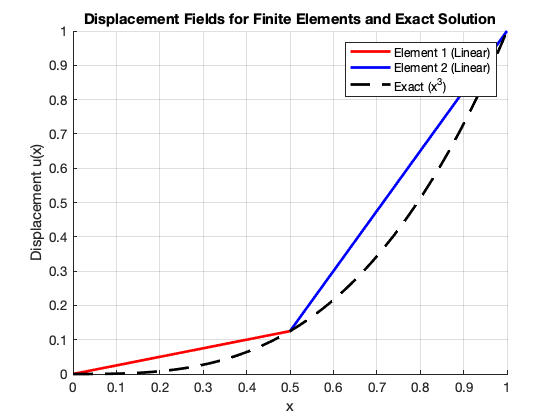

In [227]:

% Define the range of x values for each element
% element 1 will go from 0 to 0.5 in incraments of 100
% element 2 will go from 0.5 to 1 in incraments of 100
% the exact value x^3 will go from 0 to 1 in incraments of 200
x_vals_element1 = linspace(0, 0.5, 100);  % For Element 1
x_vals_element2 = linspace(0.5, 1, 100);  % For Element 2
x_vals_exact = linspace(0, 1, 200);       % For the exact solution over the whole domain

% Evaluate displacement fields at the specified x values
% sub command is substituting the values from x_vals_element into x for u_1 and u_2. In other words I am evaluating the u_1 and u_2 at each incrament.
% the double function is converting the symbolic expressions into a float value to be plotted.

u_1_vals = double(subs(u_1, x, x_vals_element1));  % Displacement for element 1
u_2_vals = double(subs(u_2, x, x_vals_element2));  % Displacement for element 2

% Exact displacement field: u(x) = x^3
u_exact_vals = x_vals_exact .^ 3;

% Plot the displacement fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1
plot(x_vals_element1, u_1_vals, 'r', 'LineWidth', 2, 'DisplayName', 'Element 1 (Linear)');
% Plot Element 2
plot(x_vals_element2, u_2_vals, 'b', 'LineWidth', 2, 'DisplayName', 'Element 2 (Linear)');
% Plot the exact displacement field
plot(x_vals_exact, u_exact_vals, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact (x^3)');

% Add labels and title
xlabel('x');
ylabel('Displacement u(x)');
title('Displacement Fields for Finite Elements and Exact Solution');
legend show;  % Show legend
grid on;
hold off;

#### Part B:
#### Compute the strain in each element by $\epsilon^{e}(x) = \textbf{B}^{e}\textbf{d}^{e} = \textbf{B}^{e}(x)\textbf{L}^{e} \textbf{d}$ and plot the finite element strain and the exact strain. How do these compare?

In [228]:
% Compute B^e for elements 1 and 2 using (4.10)
B_1 = 2*[-1 1];
B_2 = 2*[-1 1];

% Set up a matrix for the displacement vector
d_1 = [u_11 ; u_12];
d_2 = [u_21 ; u_22];

% Strain displacement for element 1 and element 2
% I referenced (4.9) but pretty much relied on page 81 for this section of the code.

e_1 = B_1 * d_1


e_1 =

    0.2500



In [229]:
e_2 = B_2 * d_2


e_2 =

    1.7500



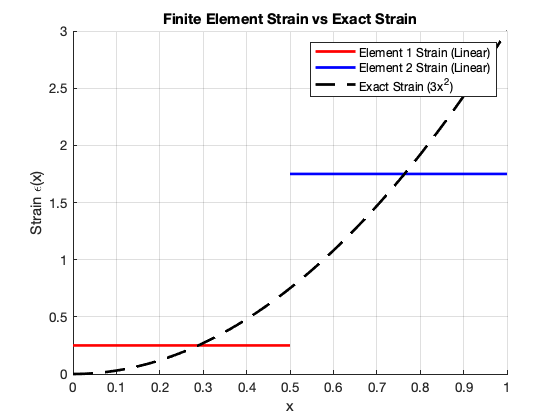

In [230]:
% Define the range of x values for each element
x_vals_element1 = linspace(0, 0.5, 100);  % For Element 1
x_vals_element2 = linspace(0.5, 1, 100);  % For Element 2
x_vals_exact = linspace(0, 1, 200);       % For the exact solution over the whole domain

% Exact strain: ε(x) = 3x^2
exact_strain = 3 * x_vals_exact .^ 2;

% Plot the strain fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1 strain (constant)
plot(x_vals_element1, e_1 * ones(size(x_vals_element1)), 'r', 'LineWidth', 2, 'DisplayName', 'Element 1 Strain (Linear)');
% Plot Element 2 strain (constant)
plot(x_vals_element2, e_2 * ones(size(x_vals_element2)), 'b', 'LineWidth', 2, 'DisplayName', 'Element 2 Strain (Linear)');
% Plot the exact strain
plot(x_vals_exact, exact_strain, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact Strain (3x^2)');

% Add labels and title
xlabel('x');
ylabel('Strain \epsilon(x)');
title('Finite Element Strain vs Exact Strain');
legend show;  % Show legend
grid on;
hold off;


The strain on the two elements are constant. Which would be expected since the displacement fields that we used are linear equaitons. The derivatives, ie the strain, of a linear equation would then be constant. However the strain of the actual displacement field is quadratic since the field was a cubic function. So the strain is not a very good approximate, but the values are about what I would expect.













#### Part C:
#### Repeat parts (a) and (b) for meshes of four and eight elements. Does the interpolation of the strain improve?
#### Four Elements

In [231]:
% Nodes (using global nodal identifications)
x1 = 0;
x2 = 1/4;
x3 = 1/2;
x4 = 3/4;
x5 = 1;

% Nodal displacements (cubic function u(x) = x^3)

% Element 1
u_11 = (x1)^3;  % u at node 1 for element 1
u_12 = (x2)^3;  % u at node 2 for element 1

% Shape functions for Element 1 (from x1 to x2)
N_11 = (x - x2) / (x1 - x2);
N_12 = (x - x1) / (x2 - x1);

% Displacement field for Element 1
u_1 = N_11 * u_11 + N_12 * u_12;

% Element 2
u_21 = (x2)^3;  % u at node 1 for element 2
u_22 = (x3)^3;  % u at node 2 for element 2

% Shape functions for Element 2 (from x2 to x3)
N_21 = (x3 - x) / (x3 - x2);
N_22 = (x - x2) / (x3 - x2);

% Displacement field for Element 2
u_2 = N_21 * u_21 + N_22 * u_22;

% Element 3
u_31 = (x3)^3;
u_32 = (x4)^3;

% Shape functions for Element 3 (from x2 to x3)
N_31 = (x - x4) / (x3 - x4);
N_32 = (x - x3) / (x4 - x3);

% Displacement field for Element 3
u_3 = N_31 * u_31 + N_32 * u_32;

% Element 4
u_41 = (x4)^3;
u_42 = (x5)^3;

% Shape functions for Element 4 (from x2 to x3)
N_41 = (x - x5) / (x4 - x5);
N_42 = (x - x4) / (x5 - x4);

% Displacement field for Element 4
u_4 = N_41 * u_41 + N_42 * u_42;

% Check boundary conditions
disp(u_11)  % Should be 0 at node 1 of element 1

     0



In [232]:
fprintf('u_12 = %.3f, u_21 = %.3f  %% Should be equal\n', u_12, u_21);

u_12 = 0.016, u_21 = 0.016  % Should be equal


In [233]:
fprintf('u_22 = %.3f, u_31 = %.3f  %% Should be equal\n', u_22, u_31);

u_22 = 0.125, u_31 = 0.125  % Should be equal


In [234]:
fprintf('u_32 = %.3f, u_41 = %.3f  %% Should be equal\n', u_32, u_41);

u_32 = 0.422, u_41 = 0.422  % Should be equal


In [235]:
disp(u_42) % Should be 1 at node 2 of element 2

     1



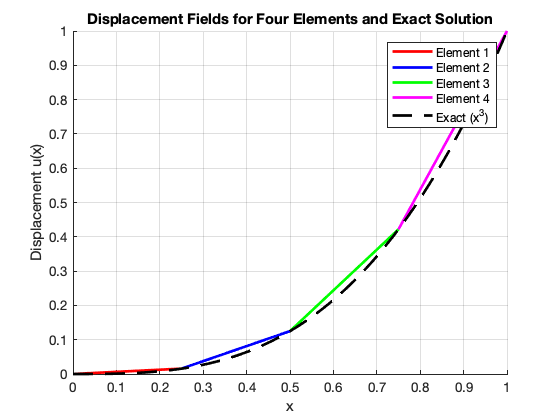

In [236]:

% Define the range of x values for each element
x_vals_element1 = linspace(x1, x2, 100);  % For Element 1
x_vals_element2 = linspace(x2, x3, 100);  % For Element 2
x_vals_element3 = linspace(x3, x4, 100);  % For Element 3
x_vals_element4 = linspace(x4, x5, 100);  % For Element 4
x_vals_exact = linspace(x1, x5, 200);     % For the exact solution over the whole domain

% Evaluate displacement fields at the specified x values
u_1_vals = double(subs(u_1, x, x_vals_element1));  % Displacement for Element 1
u_2_vals = double(subs(u_2, x, x_vals_element2));  % Displacement for Element 2
u_3_vals = double(subs(u_3, x, x_vals_element3));  % Displacement for Element 3
u_4_vals = double(subs(u_4, x, x_vals_element4));  % Displacement for Element 4

% Exact displacement field: u(x) = x^3
u_exact_vals = x_vals_exact .^ 3;

% Plot the displacement fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1
plot(x_vals_element1, u_1_vals, 'r', 'LineWidth', 2, 'DisplayName', 'Element 1');
% Plot Element 2
plot(x_vals_element2, u_2_vals, 'b', 'LineWidth', 2, 'DisplayName', 'Element 2');
% Plot Element 3
plot(x_vals_element3, u_3_vals, 'g', 'LineWidth', 2, 'DisplayName', 'Element 3');
% Plot Element 4
plot(x_vals_element4, u_4_vals, 'm', 'LineWidth', 2, 'DisplayName', 'Element 4');
% Plot the exact displacement field
plot(x_vals_exact, u_exact_vals, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact (x^3)');

% Add labels and title
xlabel('x');
ylabel('Displacement u(x)');
title('Displacement Fields for Four Elements and Exact Solution');
legend show;  % Show legend
grid on;
hold off;

In [237]:
% Compute B^e for all elements
B_1 = 4*[-1 1];
B_2 = 4*[-1 1];
B_3 = 4*[-1 1];
B_4 = 4*[-1 1];

% Set up a matrix for the displacement vector
d_1 = [u_11 ; u_12];
d_2 = [u_21 ; u_22];
d_3 = [u_31 ; u_32];
d_4 = [u_41 ; u_42];

% Strain displacement for element 1 and element 2

e_1 = B_1 * d_1;
e_2 = B_2 * d_2;
e_3 = B_3 * d_3;
e_4 = B_4 * d_4;

% Display computed strains for all elements
disp(e_1);

    0.0625



In [238]:
disp(e_2);

    0.4375



In [239]:
disp(e_3);

    1.1875



In [240]:
disp(e_4);

    2.3125



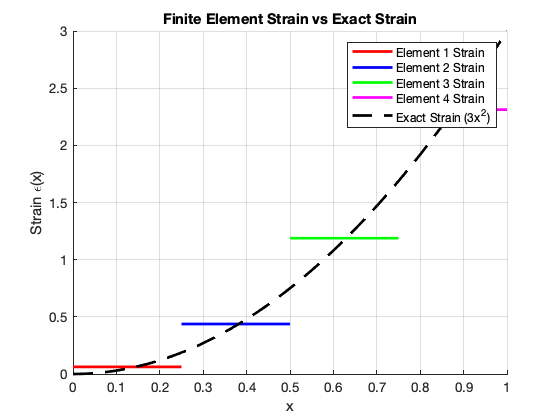

In [241]:

% Define the range of x values for each element (renaming to avoid overwriting previous variables)
x_vals_strain_element1 = linspace(x1, x2, 100);  % For Element 1
x_vals_strain_element2 = linspace(x2, x3, 100);  % For Element 2
x_vals_strain_element3 = linspace(x3, x4, 100);  % For Element 3
x_vals_strain_element4 = linspace(x4, x5, 100);  % For Element 4
x_vals_exact_strain = linspace(x1, x5, 200);     % For the exact solution over the whole domain

% Define the strain for each element (constant within each element)
strain_element1 = e_1(1);  % Strain in element 1
strain_element2 = e_2(1);  % Strain in element 2
strain_element3 = e_3(1);  % Strain in element 3
strain_element4 = e_4(1);  % Strain in element 4

% Plot the strain fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1 strain (constant)
plot(x_vals_strain_element1, strain_element1 * ones(size(x_vals_strain_element1)), 'r', 'LineWidth', 2, 'DisplayName', 'Element 1 Strain');
% Plot Element 2 strain (constant)
plot(x_vals_strain_element2, strain_element2 * ones(size(x_vals_strain_element2)), 'b', 'LineWidth', 2, 'DisplayName', 'Element 2 Strain');
% Plot Element 3 strain (constant)
plot(x_vals_strain_element3, strain_element3 * ones(size(x_vals_strain_element3)), 'g', 'LineWidth', 2, 'DisplayName', 'Element 3 Strain');
% Plot Element 4 strain (constant)
plot(x_vals_strain_element4, strain_element4 * ones(size(x_vals_strain_element4)), 'm', 'LineWidth', 2, 'DisplayName', 'Element 4 Strain');
% Plot the exact strain
plot(x_vals_exact_strain, exact_strain, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact Strain (3x^2)');

% Add labels and title
xlabel('x');
ylabel('Strain \epsilon(x)');
title('Finite Element Strain vs Exact Strain');
legend show;  % Show legend
grid on;
hold off;


Eight Elements


In [242]:
% Nodes (using global nodal identifications)
x1 = 0;
x2 = 1/8;
x3 = 1/4;
x4 = 3/8;
x5 = 1/2;
x6 = 5/8;
x7 = 3/4;
x8 = 7/8;
x9 = 1;
% Nodal displacements (cubic function u(x) = x^3)

% Element 1
u_11 = (x1)^3;  % u at node 1 for element 1
u_12 = (x2)^3;  % u at node 2 for element 1

% Shape functions for Element 1 (from x1 to x2)
N_11 = (x - x2) / (x1 - x2);
N_12 = (x - x1) / (x2 - x1);

% Displacement field for Element 1
u_1 = N_11 * u_11 + N_12 * u_12;

% Element 2
u_21 = (x2)^3;  % u at node 1 for element 2
u_22 = (x3)^3;  % u at node 2 for element 2

% Shape functions for Element 2 (from x2 to x3)
N_21 = (x3 - x) / (x3 - x2);
N_22 = (x - x2) / (x3 - x2);

% Displacement field for Element 2
u_2 = N_21 * u_21 + N_22 * u_22;

% Element 3
u_31 = (x3)^3;
u_32 = (x4)^3;

% Shape functions for Element 3 (from x2 to x3)
N_31 = (x - x4) / (x3 - x4);
N_32 = (x - x3) / (x4 - x3);

% Displacement field for Element 3
u_3 = N_31 * u_31 + N_32 * u_32;

% Element 4
u_41 = (x4)^3;
u_42 = (x5)^3;

% Shape functions for Element 4 (from x2 to x3)
N_41 = (x - x5) / (x4 - x5);
N_42 = (x - x4) / (x5 - x4);

% Displacement field for Element 4
u_4 = N_41 * u_41 + N_42 * u_42;

% Element 5
u_51 = (x5)^3;
u_52 = (x6)^3;

% Shape functions for Element 5 (from x2 to x3)
N_51 = (x - x6) / (x5 - x6);
N_52 = (x - x5) / (x6 - x5);

% Displacement field for Element 5
u_5 = N_51 * u_51 + N_52 * u_52;

% Element 6
u_61 = (x6)^3;
u_62 = (x7)^3;

% Shape functions for Element 6 (from x2 to x3)
N_61 = (x - x7) / (x6 - x7);
N_62 = (x - x6) / (x7 - x6);

% Displacement field for Element 6
u_6 = N_61 * u_61 + N_62 * u_62;

% Element 7
u_71 = (x7)^3;
u_72 = (x8)^3;

% Shape functions for Element 7 (from x2 to x3)
N_71 = (x - x8) / (x7 - x8);
N_72 = (x - x7) / (x8 - x7);

% Displacement field for Element 7
u_7 = N_71 * u_71 + N_72 * u_72;

% Element 8
u_81 = (x8)^3;
u_82 = (x9)^3;

% Shape functions for Element 8 (from x2 to x3)
N_81 = (x - x9) / (x8 - x9);
N_82 = (x - x8) / (x9 - x8);

% Displacement field for Element 8
u_8 = N_81 * u_81 + N_82 * u_82;

% Check boundary conditions
disp(u_11)  % Should be 0 at node 1 of element 1

     0



In [243]:
fprintf('u_12 = %.3f, u_21 = %.3f  %% Should be equal\n', u_12, u_21);

u_12 = 0.002, u_21 = 0.002  % Should be equal


In [244]:
fprintf('u_22 = %.3f, u_31 = %.3f  %% Should be equal\n', u_22, u_31);

u_22 = 0.016, u_31 = 0.016  % Should be equal


In [245]:
fprintf('u_32 = %.3f, u_41 = %.3f  %% Should be equal\n', u_32, u_41);

u_32 = 0.053, u_41 = 0.053  % Should be equal


In [246]:
fprintf('u_42 = %.3f, u_51 = %.3f  %% Should be equal\n', u_42, u_51);

u_42 = 0.125, u_51 = 0.125  % Should be equal


In [247]:
fprintf('u_52 = %.3f, u_61 = %.3f  %% Should be equal\n', u_52, u_61);

u_52 = 0.244, u_61 = 0.244  % Should be equal


In [248]:
fprintf('u_62 = %.3f, u_71 = %.3f  %% Should be equal\n', u_62, u_71);

u_62 = 0.422, u_71 = 0.422  % Should be equal


In [249]:
fprintf('u_72 = %.3f, u_81 = %.3f  %% Should be equal\n', u_72, u_81);

u_72 = 0.670, u_81 = 0.670  % Should be equal


In [250]:
disp(u_82) % Should be 1 at node 2 of element 8

     1



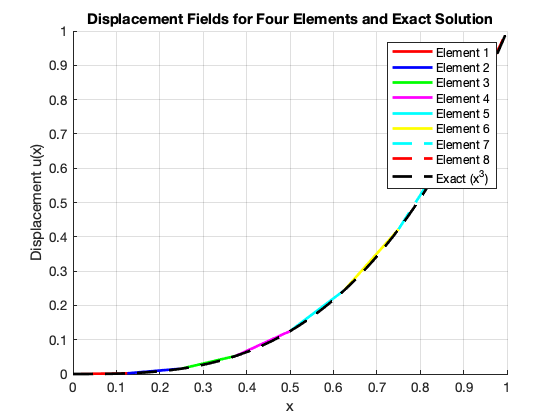

In [251]:

% Define the range of x values for each element
x_vals_element1 = linspace(x1, x2, 100);  % For Element 1
x_vals_element2 = linspace(x2, x3, 100);  % For Element 2
x_vals_element3 = linspace(x3, x4, 100);  % For Element 3
x_vals_element4 = linspace(x4, x5, 100);  % For Element 4
x_vals_element5 = linspace(x5, x6, 100);  % For Element 5
x_vals_element6 = linspace(x6, x7, 100);  % For Element 6
x_vals_element7 = linspace(x7, x8, 100);  % For Element 7
x_vals_element8 = linspace(x8, x9, 100);  % For Element 4
x_vals_exact = linspace(x1, x9, 200);     % For the exact solution over the whole domain

% Evaluate displacement fields at the specified x values
u_1_vals = double(subs(u_1, x, x_vals_element1));  % Displacement for Element 1
u_2_vals = double(subs(u_2, x, x_vals_element2));  % Displacement for Element 2
u_3_vals = double(subs(u_3, x, x_vals_element3));  % Displacement for Element 3
u_4_vals = double(subs(u_4, x, x_vals_element4));  % Displacement for Element 4
u_5_vals = double(subs(u_5, x, x_vals_element5));  % Displacement for Element 1
u_6_vals = double(subs(u_6, x, x_vals_element6));  % Displacement for Element 2
u_7_vals = double(subs(u_7, x, x_vals_element7));  % Displacement for Element 3
u_8_vals = double(subs(u_8, x, x_vals_element8));  % Displacement for Element 4

% Exact displacement field: u(x) = x^3
u_exact_vals = x_vals_exact .^ 3;

% Plot the displacement fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1
plot(x_vals_element1, u_1_vals, 'r', 'LineWidth', 2, 'DisplayName', 'Element 1');
% Plot Element 2
plot(x_vals_element2, u_2_vals, 'b', 'LineWidth', 2, 'DisplayName', 'Element 2');
% Plot Element 3
plot(x_vals_element3, u_3_vals, 'g', 'LineWidth', 2, 'DisplayName', 'Element 3');
% Plot Element 4
plot(x_vals_element4, u_4_vals, 'm', 'LineWidth', 2, 'DisplayName', 'Element 4');
% Plot Element 5
plot(x_vals_element5, u_5_vals, 'c', 'LineWidth', 2, 'DisplayName', 'Element 5');
% Plot Element 6
plot(x_vals_element6, u_6_vals, 'y', 'LineWidth', 2, 'DisplayName', 'Element 6');
% Plot Element 7
plot(x_vals_element7, u_7_vals, 'c--', 'LineWidth', 2, 'DisplayName', 'Element 7');
% Plot Element 8
plot(x_vals_element8, u_8_vals, 'r--','LineWidth', 2, 'DisplayName', 'Element 8');
% Plot the exact displacement field
plot(x_vals_exact, u_exact_vals, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact (x^3)');

% Add labels and title
xlabel('x');
ylabel('Displacement u(x)');
title('Displacement Fields for Four Elements and Exact Solution');
legend show;  % Show legend
grid on;
hold off;

In [252]:
% Compute B^e for all elements
B_1 = 8*[-1 1];
B_2 = 8*[-1 1];
B_3 = 8*[-1 1];
B_4 = 8*[-1 1];
B_5 = 8*[-1 1];
B_6 = 8*[-1 1];
B_7 = 8*[-1 1];
B_8 = 8*[-1 1];

% Set up a matrix for the displacement vector
d_1 = [u_11 ; u_12];
d_2 = [u_21 ; u_22];
d_3 = [u_31 ; u_32];
d_4 = [u_41 ; u_42];
d_5 = [u_51 ; u_52];
d_6 = [u_61 ; u_62];
d_7 = [u_71 ; u_72];
d_8 = [u_81 ; u_82];

% Strain displacement for element 1 and element 2

e_1 = B_1 * d_1;
e_2 = B_2 * d_2;
e_3 = B_3 * d_3;
e_4 = B_4 * d_4;
e_5 = B_5 * d_5;
e_6 = B_6 * d_6;
e_7 = B_7 * d_7;
e_8 = B_8 * d_8;

% Display computed strains for all elements
disp(e_1);

    0.0156



In [253]:
disp(e_2);

    0.1094



In [254]:
disp(e_3);

    0.2969



In [255]:
disp(e_4);

    0.5781



In [256]:
disp(e_5);

    0.9531



In [257]:
disp(e_6);

    1.4219



In [258]:
disp(e_7);

    1.9844



In [259]:
disp(e_8);

    2.6406



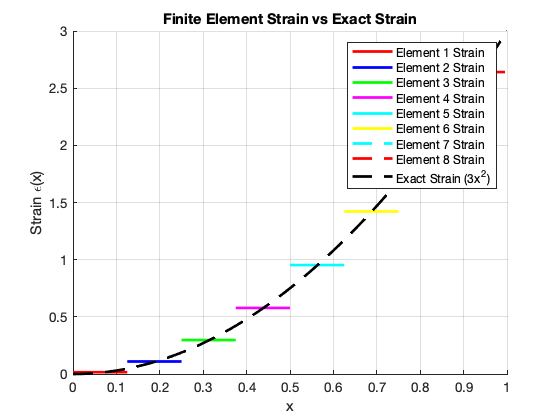

In [260]:

% Define the range of x values for each element (renaming to avoid overwriting previous variables)
x_vals_strain_element1 = linspace(x1, x2, 100);  % For Element 1
x_vals_strain_element2 = linspace(x2, x3, 100);  % For Element 2
x_vals_strain_element3 = linspace(x3, x4, 100);  % For Element 3
x_vals_strain_element4 = linspace(x4, x5, 100);  % For Element 4
x_vals_strain_element5 = linspace(x5, x6, 100);  % For Element 5
x_vals_strain_element6 = linspace(x6, x7, 100);  % For Element 6
x_vals_strain_element7 = linspace(x7, x8, 100);  % For Element 7
x_vals_strain_element8 = linspace(x8, x9, 100);  % For Element 8
x_vals_exact_strain = linspace(x1, x9, 200);     % For the exact solution over the whole domain

% Define the strain for each element (constant within each element)
strain_element1 = e_1(1);  % Strain in element 1
strain_element2 = e_2(1);  % Strain in element 2
strain_element3 = e_3(1);  % Strain in element 3
strain_element4 = e_4(1);  % Strain in element 4
strain_element5 = e_5(1);  % Strain in element 5
strain_element6 = e_6(1);  % Strain in element 6
strain_element7 = e_7(1);  % Strain in element 7
strain_element8 = e_8(1);  % Strain in element 8

% Plot the strain fields
figure;
hold on;  % Allow multiple plots on the same figure

% Plot Element 1 strain (constant)
plot(x_vals_strain_element1, strain_element1 * ones(size(x_vals_strain_element1)), 'r', 'LineWidth', 2, 'DisplayName', 'Element 1 Strain');
% Plot Element 2 strain (constant)
plot(x_vals_strain_element2, strain_element2 * ones(size(x_vals_strain_element2)), 'b', 'LineWidth', 2, 'DisplayName', 'Element 2 Strain');
% Plot Element 3 strain (constant)
plot(x_vals_strain_element3, strain_element3 * ones(size(x_vals_strain_element3)), 'g', 'LineWidth', 2, 'DisplayName', 'Element 3 Strain');
% Plot Element 4 strain (constant)
plot(x_vals_strain_element4, strain_element4 * ones(size(x_vals_strain_element4)), 'm', 'LineWidth', 2, 'DisplayName', 'Element 4 Strain');
% Plot Element 5 strain (constant)
plot(x_vals_strain_element5, strain_element5 * ones(size(x_vals_strain_element5)), 'c', 'LineWidth', 2, 'DisplayName', 'Element 5 Strain');
% Plot Element 6 strain (constant)
plot(x_vals_strain_element6, strain_element6 * ones(size(x_vals_strain_element6)), 'y', 'LineWidth', 2, 'DisplayName', 'Element 6 Strain');
% Plot Element 7 strain (constant)
plot(x_vals_strain_element7, strain_element7 * ones(size(x_vals_strain_element7)), 'c--', 'LineWidth', 2, 'DisplayName', 'Element 7 Strain');
% Plot Element 8 strain (constant)
plot(x_vals_strain_element8, strain_element8 * ones(size(x_vals_strain_element8)), 'r--', 'LineWidth', 2, 'DisplayName', 'Element 8 Strain');
% Plot the exact strain
exact_strain = 3 * x_vals_exact_strain.^2;
plot(x_vals_exact_strain, exact_strain, 'k--', 'LineWidth', 2, 'DisplayName', 'Exact Strain (3x^2)');

% Add labels and title
xlabel('x');
ylabel('Strain \epsilon(x)');
title('Finite Element Strain vs Exact Strain');
legend show;  % Show legend
grid on;
hold off;


As we increase the elements, we get a better fit for the displacement field. Eight elements follows the actual displacement field equation fairly well. As for the strain, we are still getting constant values, but they trend with the displacement field. So the more elements we use, the mroe accurate the results.

#### Part D:
#### The error of an interpolation is generally measured by what is called a L2 norm. The error in the L2 norm, which we denote by e, is given by $e=\int_0^L (u^e -u)^2 \,dx$ where $~u=x^3$ in this case. Compute the error e for meshes of two, four and eight linear displacement elements. Use Gauss quadrature for integration. Then plot (this can be done manually) the error versus the element size on a log\-log plot. This should almost be a straight line. What is its slope? This slope is indicative of the rate of convergence of the element.


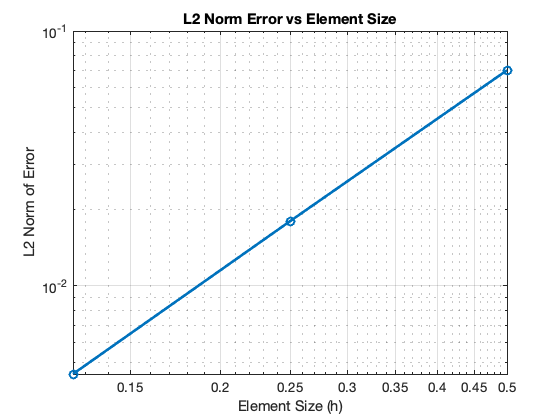

In [261]:
% Define the exact solution u(x) = x^3 as an anonymous function
% @(x): This defines an anonymous function where x is the input variable.
% x.^3: This is the function body, which means the output of the function is
% x^3 . The .^ operator ensures that this works element-wise (in case x is a vector or matrix).
exact_solution = @(x) x.^3;

% Define the Gauss quadrature points and weights for a 2-point rule
% These were given in the Table in chapter 4
gauss_points = [-sqrt(1/3), sqrt(1/3)];  % Gauss points in [-1, 1]
gauss_weights = [1, 1];  % Weights for 2-point quadrature

% Initialize an array (3x1 matrix) to store the L2 norm error for 2, 4, and 8 elements
error_L2 = zeros(3, 1);  % To store errors for each mesh size

% Define the mesh sizes
mesh_sizes = [2, 4, 8];
L = 1;  % Length of the domain is 1 from part a

% Loop over each mesh size so that it will run the values for 2, 4, and 8
% elements.
for mesh_index = 1:length(mesh_sizes)
    num_elements = mesh_sizes(mesh_index);  % Get the number of elements
    element_length = L / num_elements;  % Compute the length of each element
    error_sum = 0;  % Initialize the error sum for this mesh size

    % Loop over each element
    for elem = 1:num_elements
        % Define element boundaries for each element
        x1 = (elem - 1) * element_length;  % Left node of element
        x2 = elem * element_length;        % Right node of element

        % linear shape function for the element
        u_h = @(x) ((x2 - x) / element_length) * exact_solution(x1) + ...
                   ((x - x1) / element_length) * exact_solution(x2);

        % Compute the squared error for each Gauss point
        for i = 1:length(gauss_points)
            % Map Gauss point to the actual element
            xi = ((x2 - x1) / 2) * gauss_points(i) + (x2 + x1) / 2;

            % Compute the error at the Gauss point
            error_at_gauss_point = (u_h(xi) - exact_solution(xi))^2;

            % Sum the contribution of this Gauss point
            error_sum = error_sum + gauss_weights(i) * error_at_gauss_point * (x2 - x1) / 2;
        end
    end

    % Store the L2 norm error for this mesh size
    error_L2(mesh_index) = sqrt(error_sum);
end

% Plot the error vs element size (log-log plot)
element_sizes = 1 ./ mesh_sizes;  % Element size = 1 / number of elements
figure;
loglog(element_sizes, error_L2, '-o', 'LineWidth', 2);
xlabel('Element Size (h)');
ylabel('L2 Norm of Error');
title('L2 Norm Error vs Element Size');
grid on;

In [262]:

% Optionally, compute the slope of the log-log plot (convergence rate)
p = polyfit(log(element_sizes), log(error_L2), 1);
fprintf('Slope of the log-log plot (rate of convergence): %.2f\n', p(1));

Slope of the log-log plot (rate of convergence): 1.98


#### Part E:
#### Repeat part (d) using quadratic two\-node quadratic elements.

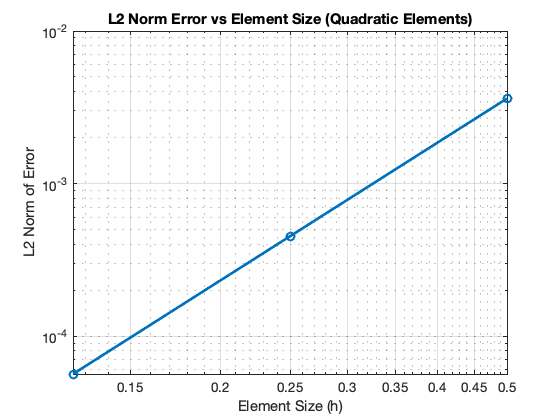

In [263]:
% Define the exact solution u(x) = x^3 as an anonymous function
exact_solution = @(x) x.^3;

% Define the Gauss quadrature points and weights for a 3-point rule (since we are now using quadratic elements)
gauss_points = [-sqrt(3/5), 0, sqrt(3/5)];  % Gauss points in [-1, 1]
gauss_weights = [5/9, 8/9, 5/9];  % Weights for 3-point quadrature

% Initialize an array to store the L2 norm error for 2, 4, and 8 elements
error_L2 = zeros(3, 1);  % To store errors for each mesh size

% Define the mesh sizes
mesh_sizes = [2, 4, 8];
L = 1;  % Length of the domain

% Loop over each mesh size
for mesh_index = 1:length(mesh_sizes)
    num_elements = mesh_sizes(mesh_index);  % Get the number of elements
    element_length = L / num_elements;  % Compute the length of each element
    error_sum = 0;  % Initialize the error sum for this mesh size

    % Loop over each element
    for elem = 1:num_elements
        % Define element boundaries and mid-point
        x1 = (elem - 1) * element_length;  % Left node of element
        x3 = elem * element_length;        % Right node of element
        x2 = (x1 + x3) / 2;               % Mid-point of element

        % Finite element approximation for this element (quadratic shape functions)
        N1 = @(x) (x - x2) * (x - x3) / ((x1 - x2) * (x1 - x3));
        N2 = @(x) (x - x1) * (x - x3) / ((x2 - x1) * (x2 - x3));
        N3 = @(x) (x - x1) * (x - x2) / ((x3 - x1) * (x3 - x2));

        % Approximate displacement u^e for the element using the shape functions
        u_h = @(x) N1(x) * exact_solution(x1) + N2(x) * exact_solution(x2) + N3(x) * exact_solution(x3);

        % Compute the squared error for each Gauss point
        for i = 1:length(gauss_points)
            % Map Gauss point to the actual element
            xi = ((x3 - x1) / 2) * gauss_points(i) + (x3 + x1) / 2;

            % Compute the error at the Gauss point
            error_at_gauss_point = (u_h(xi) - exact_solution(xi))^2;

            % Sum the contribution of this Gauss point
            error_sum = error_sum + gauss_weights(i) * error_at_gauss_point * (x3 - x1) / 2;
        end
    end

    % Store the L2 norm error for this mesh size
    error_L2(mesh_index) = sqrt(error_sum);
end

% Plot the error vs element size (log-log plot)
element_sizes = 1 ./ mesh_sizes;  % Element size = 1 / number of elements
figure;
loglog(element_sizes, error_L2, '-o', 'LineWidth', 2);
xlabel('Element Size (h)');
ylabel('L2 Norm of Error');
title('L2 Norm Error vs Element Size (Quadratic Elements)');
grid on;

In [264]:

% Optionally, compute the slope of the log-log plot (convergence rate)
p = polyfit(log(element_sizes), log(error_L2), 1);
fprintf('Slope of the log-log plot (rate of convergence for quadratic elements): %.2f\n', p(1));

Slope of the log-log plot (rate of convergence for quadratic elements): 3.00





### Problem 4.6
### Use Gauss quadrature to obtain exact values for the following integrals. Verify by analytical integration:
#### a.) $\int_0^4 (x^2 +1)\,dx$

In [265]:
% Define the function to integrate f(x) = x^2 + 1
f = @(x) x.^2 + 1;

% Define the Gauss points and weights for the interval [-1, 1]
gauss_points = [-sqrt(1/3), sqrt(1/3)];
gauss_weights = [1, 1];

% Define the transformation from [-1, 1] to [0, 4]
a = 0;
b = 4;
transformation = @(xi) (b - a) / 2 * xi + (b + a) / 2;
jacobian = (b - a) / 2;

% Compute the Gauss quadrature approximation
integral_gauss = 0;
for i = 1:length(gauss_points)
    xi = gauss_points(i);
    integral_gauss = integral_gauss + gauss_weights(i) * f(transformation(xi)) * jacobian;
end

% Display the result
fprintf('Gauss quadrature approximation of integral from 0 to 4 of (x^2 + 1) dx: %.6f\n', integral_gauss);

Gauss quadrature approximation of integral from 0 to 4 of (x^2 + 1) dx: 25.333333


In [266]:

% Compute the analytical solution
analytical_solution = integral(@(x) x.^2 + 1, 0, 4);
fprintf('Analytical solution: %.6f\n', analytical_solution);

Analytical solution: 25.333333




#### b.) $\int_{-1}^1 (\xi^4 +2\xi^2 )\,dx$

In [267]:
% Define the function to integrate f(xi) = xi^4 + 2xi^2
f = @(xi) xi.^4 + 2*xi.^2;

% Gauss quadrature for [-1, 1] (already in the interval)
integral_gauss = 0;
for i = 1:length(gauss_points)
    xi = gauss_points(i);
    integral_gauss = integral_gauss + gauss_weights(i) * f(xi);
end

% Display the result
fprintf('Gauss quadrature approximation of integral from -1 to 1 of (xi^4 + 2xi^2) dxi: %.6f\n', integral_gauss);

Gauss quadrature approximation of integral from -1 to 1 of (xi^4 + 2xi^2) dxi: 1.555556


In [268]:

% Compute the analytical solution
analytical_solution = integral(@(xi) xi.^4 + 2*xi.^2, -1, 1);
fprintf('Analytical solution: %.6f\n', analytical_solution);

Analytical solution: 1.733333




































!!!EndOutputRegion!!!